In [1]:
#: imports!

import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Lecture 7

## Group, Merge, Conditionals, and Iteration

# Grouping (Again)

Sub-groups

## Our familiar NBA data...

In [3]:
#: read from csv and relabel
nba = bpd.read_csv('data/nba_salaries.csv').set_index('PLAYER')
nba = nba.assign(SALARY=nba.get("'15-'16 SALARY")).drop(columns="'15-'16 SALARY")
nba

,POSITION,TEAM,SALARY
PLAYER,,,
Paul Millsap,PF,Atlanta Hawks,18.671659
Al Horford,C,Atlanta Hawks,12.000000
Tiago Splitter,C,Atlanta Hawks,9.756250
Jeff Teague,PG,Atlanta Hawks,8.000000
Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...
Gary Neal,PG,Washington Wizards,2.139000
DeJuan Blair,C,Washington Wizards,2.000000
Kelly Oubre Jr.,SF,Washington Wizards,1.920240


## How big is each team?

- We know how to do this: `.groupby()`.
- **Notice**: team names become the row labels.

In [7]:
nba.groupby('TEAM').count() # SOLUTION

,POSITION,SALARY
TEAM,,
Atlanta Hawks,14,14
Boston Celtics,15,15
Brooklyn Nets,13,13
Charlotte Hornets,18,18
Chicago Bulls,12,12
...,...,...
Sacramento Kings,11,11
San Antonio Spurs,13,13
Toronto Raptors,17,17


## How much does each team pay in payroll?

- Instead of counting, we want to sum the `SALARY` column.

In [8]:
nba.groupby('TEAM').sum() # SOLUTION

,SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
...,...
Sacramento Kings,68.384890
San Antonio Spurs,84.652074
Toronto Raptors,74.672620


## How many of each position does each team have?

- We want to count...
- but sizes of groups within groups.
- i.e., sizes of position groups within teams.

In [9]:
nba.groupby(['TEAM', 'POSITION']).count() # SOLUTION

SALARY
TEAM               POSITION        
Atlanta Hawks      C              3
                   PF             2
                   PG             2
                   SF             2
                   SG             5
...                             ...
Washington Wizards C              3
                   PF             3
                   PG             3
                   SF             4
                   SG             4

[147 rows x 1 columns]

## `.groupby()` with subgroups

- To make groups within groups (with groups, etc.)...
- Pass a list of column names to `.groupby()`:

```
table.groupby([col_1, col_2, col_3])
```
- Groups `col_1` first.
- Within each group, groups by `col_2`,
- So on

## Notice the index...

- This is a "MultiIndex"
- We won't worry about those...
- Use `.reset_index()` to move index back to columns.

In [10]:
nba.groupby(['TEAM', 'POSITION']).count()

SALARY
TEAM               POSITION        
Atlanta Hawks      C              3
                   PF             2
                   PG             2
                   SF             2
                   SG             5
...                             ...
Washington Wizards C              3
                   PF             3
                   PG             3
                   SF             4
                   SG             4

[147 rows x 1 columns]

## Which team has the most centers?

In [11]:
position_counts = nba.groupby(['TEAM', 'POSITION']).count().reset_index() # SOLUTION
position_counts

,TEAM,POSITION,SALARY
0,Atlanta Hawks,C,3
1,Atlanta Hawks,PF,2
2,Atlanta Hawks,PG,2
3,Atlanta Hawks,SF,2
4,Atlanta Hawks,SG,5
...,...,...,...
142,Washington Wizards,C,3
143,Washington Wizards,PF,3
144,Washington Wizards,PG,3
145,Washington Wizards,SF,4


In [12]:
# select only the centers
position_counts[position_counts.get('POSITION') == 'C'].sort_values('SALARY').index[-1] # SOLUTION

25

## Example: Sea Temperatures

- The sea surface temperature in La Jolla, every day since August 22, 1916

In [13]:
sea_temp = bpd.read_csv('data/sea_temp.csv')
sea_temp

,YEAR,MONTH,DAY,SURFACE_TEMP
0,1916,8,22,19.5
1,1916,8,23,19.9
2,1916,8,24,19.7
3,1916,8,25,19.7
4,1916,8,26,19.5
...,...,...,...,...
36292,2019,5,26,18.0
36293,2019,5,27,17.6
36294,2019,5,28,17.1
36295,2019,5,29,18.1


## What was the hottest month (average temp)?

In [14]:
# define table `hottest` using `sea_temp`, in descending order by temp
# BEGIN SOLUTION
hottest = (
    sea_temp
    .groupby(['YEAR', 'MONTH'])
    .mean()
    .reset_index()
    .sort_values('SURFACE_TEMP', ascending=False)
)
# END SOLUTION

In [15]:
hottest.get('YEAR').iloc[0]

2018

In [16]:
hottest.get('MONTH').iloc[0]

8

## Bonus Plot

- Yearly average surface temperature

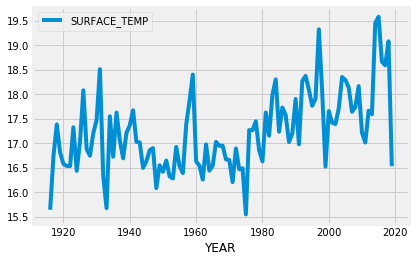

In [17]:
sea_temp.groupby('YEAR').mean().plot(y='SURFACE_TEMP')

## Summary: `.groupby`

- Pass a list of columns to make subgroups.
- *Always* use `.reset_index()` after to move index to columns.

# Merge

Combining columns from two different tables

## Example

In [18]:
products = bpd.DataFrame().assign(
    Location=['Cups', 'Cups', 'Cups', 'Art of Espresso', 'Art of Espresso', 'Perks', 'Perks'],
    Product=['Green Tea', 'Latte', 'Drip Coffee', 'Espresso', 'Latte', 'Drip Coffee', 'Green Tea'],
    Price=[1.25, 2.50, 1.00, 2.00, 3.00, 1.25, 1.50]
)
products

,Location,Product,Price
0,Cups,Green Tea,1.25
1,Cups,Latte,2.50
2,Cups,Drip Coffee,1.00
3,Art of Espresso,Espresso,2.00
4,Art of Espresso,Latte,3.00
5,Perks,Drip Coffee,1.25
6,Perks,Green Tea,1.50


## Example

In [19]:
coupons = bpd.DataFrame().assign(
    Location=['Cups', 'Art of Espresso'],
    Discount=[.25, .10]
)
coupons

,Location,Discount
0,Cups,0.25
1,Art of Espresso,0.10


## How do we calculate discounted price of each product?

- Idea: "cross-reference" tables.
- I.e., for each row in `products`, find discount in `coupons` for that row's `Location`.
- This is what `.merge()` does:

In [20]:
with_discounts = products.merge(coupons, left_on='Location', right_on='Location')
with_discounts

,Location,Product,Price,Discount
0,Cups,Green Tea,1.25,0.25
1,Cups,Latte,2.50,0.25
2,Cups,Drip Coffee,1.00,0.25
3,Art of Espresso,Espresso,2.00,0.10
4,Art of Espresso,Latte,3.00,0.10


In [21]:
with_discounts.assign(
    Discounted=with_discounts.get('Price') * with_discounts.get('Discount')
)

,Location,Product,Price,Discount,Discounted
0,Cups,Green Tea,1.25,0.25,0.3125
1,Cups,Latte,2.50,0.25,0.6250
2,Cups,Drip Coffee,1.00,0.25,0.2500
3,Art of Espresso,Espresso,2.00,0.10,0.2000
4,Art of Espresso,Latte,3.00,0.10,0.3000


## Merging

- Pick a "left" table and a "right" table.
- Choose a column from each to "merge on".

<img src="data/merge.png" />

## `.merge()` method

```python
left_table.merge(
    right_table, 
    left_on=left_column_name,
    right_on=right_column_name
)
```
- `left_on` and `right_on` should be column names (don't have to be the same)
- one row for every match
- deletes rows that don't match!

## What if column names don't match?

In [22]:
cafes = coupons.assign(
    Cafe=coupons.get('Location')
).drop(columns='Location')
cafes

,Discount,Cafe
0,0.25,Cups
1,0.10,Art of Espresso


In [23]:
products.merge(cafes, left_on='Location', right_on='Cafe')

,Location,Product,Price,Discount,Cafe
0,Cups,Green Tea,1.25,0.25,Cups
1,Cups,Latte,2.50,0.25,Cups
2,Cups,Drip Coffee,1.00,0.25,Cups
3,Art of Espresso,Espresso,2.00,0.10,Art of Espresso
4,Art of Espresso,Latte,3.00,0.10,Art of Espresso


## What if we want to "merge on" an index?

- Instead of using `left_on` or `right_on`, use `left_index=True` or `right_index=True`

In [24]:
coupons_by_location = coupons.set_index('Location')
coupons_by_location

,Discount
Location,
Cups,0.25
Art of Espresso,0.10


In [25]:
products.merge(
    coupons_by_location, 
    left_on='Location', 
    right_index=True
)

,Location,Product,Price,Discount
0,Cups,Green Tea,1.25,0.25
1,Cups,Latte,2.50,0.25
2,Cups,Drip Coffee,1.00,0.25
3,Art of Espresso,Espresso,2.00,0.10
4,Art of Espresso,Latte,3.00,0.10


# Finish Line

Those are all of the table methods we'll learn.

With the exception of `table.sample`, which we'll see soon.

# Booleans and Conditionals

## Booleans

- A **Boolean** variable is either true or false.
    - yes or no
    - on or off
    - 0 or 1
- Named after George Boole.
- In Python: 
    - we have the `bool` type, `True` and `False` literals.
    - `and`, `or`, `not` operators.

In [26]:
x = True

In [27]:
type(x)

bool

## The `not` operator

- Flips a `True` to a `False`, and a `False` to a `True`.

In [28]:
is_sunny = True

not is_sunny

False

## The `and` operator

- Placed between two `bool`s.
- `True` if *both* are true, otherwise `False`.

In [29]:
is_sunny = True
is_warm = False

is_sunny and is_warm

False

## The `or` operator

- Placed between two `bool`s.
- `True` if at least one of them is `True`, otherwise `False`.

In [30]:
is_sunny = True
is_warm = False

is_sunny or is_warm

True

## Building expressions

- We can chain together longer expressions.
- Parsed from left to right.
- But use parenthesis to make things clearer.

In [31]:
is_sunny = True
is_warm = False
is_humid = True

is_humid and not is_sunny or is_warm

False

## Discussion question

    a = True
    b = True
    not(((not a) and b) or ((not b) or a))
    
What does the expression evaluate to?

- A) `True`
- B) `False`
- C) 32.7

In [33]:
#: let's see...
# BEGIN SOLUTION
a = True
b = True
not(((not a) and b) or ((not b) or a))
# END SOLUTION

False

## Comparisons

- Comparisons produce `bool`s:

In [34]:
4 > 2

True

## Comparison operators

Operator | Description
-------------| ----------
`>` | greater than
`>=` | greater than or equal to
`<` | less than
`<=` | less than or equal to
`==` | equals
`!=` | not equals

## Careful!

- Note that there's a difference between `=` and `==`.
- Using the wrong one can result in a `SyntaxError`.

In [35]:
3 = 5

SyntaxError: can't assign to literal (<ipython-input-35-19d406bf21fe>, line 1)

## Conditionals

- Do something if an expression is `True`.
- Syntax (don't forget the colon):


    if <condition>:
        <body>
            
- Indentation matters!

In [36]:
#: in San Diego
is_sunny = True

if is_sunny:
    print('Wear sunglasses!')

Wear sunglasses!


## Conditionals

- `else`: do something else if condition is `False`

In [37]:
#: in San Diego
is_sunny = False

if is_sunny:
    print('Wear sunglasses')
else:
    print('Stay inside')

Stay inside


## Conditionals

- `elif`: If condition is `False`, check another condition
- "Falls through" until first `True` condition.
- But doesn't continue after that.
- "Catch" everything that falls through with `else`

In [38]:
#: in San Diego
is_raining = True
is_warm = False
is_sunny = True

if is_raining:
    print('Grab an umbrella')
elif is_warm:
    print('Wear shorts')
elif is_sunny:
    print('Wear sunglasses')
else:
    print('All conditions false!')

Grab an umbrella


## Example: sign function

Write a function that takes a single number and prints "positive" if it is a positive number and "negative" if it is a negative number.

In [39]:
def sign(x):
    if x > 0:
        print('positive')
    elif x < 0:
        print('negative')
    else:
        print('neither!')

In [40]:
sign(7)

positive


In [41]:
sign(-2)

negative


In [42]:
sign(0)

neither!


## Example: the other one

- Develop a function which takes a 2-element array and a value.
- If the value is:
    - the first element, return the second.
    - the second element, return the first.
    
    
    >>> choices = np.array(['moon', 'sun'])
    >>> other_one(choices, 'moon')
    sun
    >>> other_one(choices, 'sun')
    moon

In [43]:
#- define `other_one(arr, value)`
def other_one(arr, value):
    if value == arr[0]:
        return arr[1]
    elif value == arr[1]:
        return arr[0]
    else:
        print('Invalid input!')

## Discussion question

```
def func(a, b):
    if (a + b > 4 and b > 0):
        return 'foo'
    elif (a*b >= 4 or b < 0):
        return 'bar'
    else:
        return 'baz'
```

What is returned when `func(2, 2)` is called?

- A) foo
- B) bar
- C) baz
- D) more than one of the above

## Using parenthesis...

Instead of:

    if (a + b > 4 and b > 0):
        ...

You might prefer: 

    if (a + b > 4) and (b > 0):
        ...
        
They do the same thing, because comparison operators are evaluated first.

Fun fact: if `a = 2`, and `b = 2`, `a + b > (4 and b) > 0` evaluates to `True`.

# Iteration

We can use Python to help automate our job at NASA:

In [44]:
#: counting down...
import time

print("Launching in...")
print("t-minus", 10)
time.sleep(1)
print("t-minus", 9)
time.sleep(1)
print("t-minus", 8)
time.sleep(1)
print("t-minus", 7)
time.sleep(1)
print("t-minus", 6)
time.sleep(1)
print("t-minus", 5)
time.sleep(1)
print("t-minus", 4)
time.sleep(1)
print("t-minus", 3)
time.sleep(1)
print("t-minus", 2)
time.sleep(1)
print("t-minus", 1)
time.sleep(1)
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## Better approach: use a `for`-loop.

In [45]:
print("Launching in...")

for t in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print("t-minus", t)
    time.sleep(1)
    
print("Blast off!")

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off!


## `for`-loops

- Do something for every value in a sequence
- Syntax (don't forget the colon):

```
for <loop variable> in <sequence>:
    <body>
```

- Indentation matters!


In [46]:
#: loop variable can be anything
for x in [1, 2, 3, 4]:
    print(x ** 2)

1
4
9
16


## Ranges

- We can use `np.arange` to create sequences to iterate over:

In [47]:
#: count to 9, starting from 0
for x in np.arange(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [48]:
#: countdown
for x in np.arange(10, 0, -1):
    print(x)

10
9
8
7
6
5
4
3
2
1


## Iterating over array by indexing

In [49]:
#: use np.arange(size)
flavors = np.array(['Chocolate', 'Vanilla', 'Strawberry'])

for index in np.arange(flavors.size):
    print('Flavor number', index, 'is', flavors[index])

Flavor number 0 is Chocolate
Flavor number 1 is Vanilla
Flavor number 2 is Strawberry


In [50]:
# using enumerate()
for index, flavor in enumerate(flavors):
    print('Flavor number', index, 'is', flavor)

Flavor number 0 is Chocolate
Flavor number 1 is Vanilla
Flavor number 2 is Strawberry


## Building an array by iterating

- How many letters are in each name?
- We want to save our results!
- Use `np.append`: appends an element to end of array.

In [51]:
#: names
names = ['Winona', 'Xanthippe', 'Yvonne', 'Zelda']

# empty array
lengths = np.array([])

for name in names:
    lengths = np.append(lengths, len(name))
    
lengths

array([6., 9., 6., 5.])